In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ashwin
[nltk_data]     Vengurlekar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ashwin
[nltk_data]     Vengurlekar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
def tokenize_text(text):
    return word_tokenize(text)

input_text = "Tokenization is the process of breaking text into words or phrase"

tokens = tokenize_text(input_text)
print(tokens)

['Tokenization', 'is', 'the', 'process', 'of', 'breaking', 'text', 'into', 'words', 'or', 'phrase']


In [4]:
def remove_non_alphabets(tokens):
    return [token for token in tokens if token.isalpha()]

alphabetic_tokens = remove_non_alphabets(tokens)
print(alphabetic_tokens)

['Tokenization', 'is', 'the', 'process', 'of', 'breaking', 'text', 'into', 'words', 'or', 'phrase']


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ashwin
[nltk_data]     Vengurlekar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#We remove unused words i.e is, the with help of stopwords
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return[token for token in tokens if token.lower() not in stop_words]

filtered_tokens = remove_stopwords(alphabetic_tokens)
print(filtered_tokens)

['Tokenization', 'process', 'breaking', 'text', 'words', 'phrase']


In [7]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [8]:
for i in filtered_tokens:
    print(i," :", ps.stem(i))

Tokenization  : token
process  : process
breaking  : break
text  : text
words  : word
phrase  : phrase


In [9]:
#method 1--- defining function for stemming

from nltk.stem import PorterStemmer 

def perform_stemming(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

stemmed_tokens = perform_stemming(filtered_tokens)
print(stemmed_tokens)

['token', 'process', 'break', 'text', 'word', 'phrase']


In [10]:
pos = nltk.pos_tag(filtered_tokens)

In [11]:
print('POS', pos)

POS [('Tokenization', 'NN'), ('process', 'NN'), ('breaking', 'VBG'), ('text', 'NN'), ('words', 'NNS'), ('phrase', 'NN')]


In [12]:
#Calling funtion for pos

from nltk import pos_tag

def perform_pos_tagging(tokens):
    return pos_tag(tokens)

pos_tags = perform_pos_tagging(filtered_tokens)
print(pos_tags)

[('Tokenization', 'NN'), ('process', 'NN'), ('breaking', 'VBG'), ('text', 'NN'), ('words', 'NNS'), ('phrase', 'NN')]


In [13]:
from nltk import pos_tag
from nltk import ne_chunk

nltk.download('maxent_ne_chunker')
nltk.download('words')

def perform_named_entity_recognition(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    named_entities = ne_chunk(pos_tags)
    return named_entities

named_entities = perform_named_entity_recognition(input_text)
print(named_entities)

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Ashwin
[nltk_data]     Vengurlekar\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Ashwin
[nltk_data]     Vengurlekar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  (GPE Tokenization/NN)
  is/VBZ
  the/DT
  process/NN
  of/IN
  breaking/VBG
  text/NN
  into/IN
  words/NNS
  or/CC
  phrase/NN)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

def create_bag_of_words(texts):
    vectorizer = CountVectorizer()
    bag_of_words = vectorizer.fit_transform(texts)
    return bag_of_words,vectorizer.get_feature_names_out()

texts = ["This is a document.","This document is the second document."]
bag_of_words,feature_names = create_bag_of_words(texts)
print(bag_of_words.toarray())
print(feature_names)

[[1 1 0 0 1]
 [2 1 1 1 1]]
['document' 'is' 'second' 'the' 'this']


In [15]:
def chunk_noun_phrases (text):
    grammar = r"""
       NP: {<DT>?<JJ>*<NN>} # NP (noun phrase)
       """
    chunk_parser = nltk. RegexpParser(grammar)
    tree = chunk_parser.parse(pos_tags)
    flat_tree = ' '.join([str(chunk) for chunk in tree.flatten()])
    return flat_tree

result_tree = chunk_noun_phrases(len(input_text))
print(result_tree)

('Tokenization', 'NN') ('process', 'NN') ('breaking', 'VBG') ('text', 'NN') ('words', 'NNS') ('phrase', 'NN')


In [25]:
! pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ------------ --------------------------- 92.2/300.0 kB 2.6 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.0 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 2.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


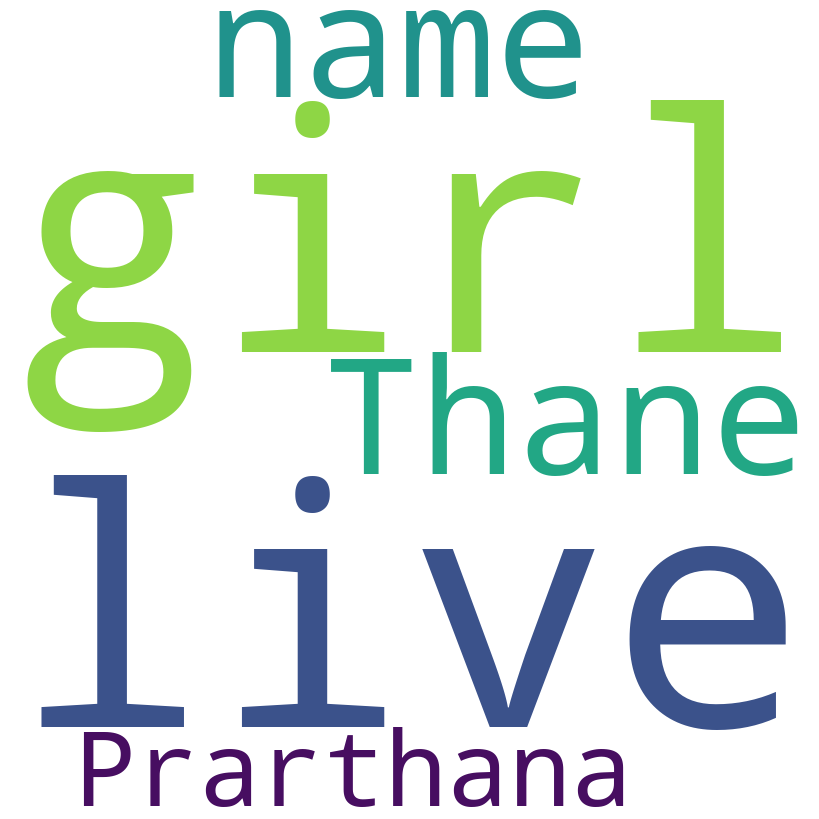

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

input_text1 = "I am a girl. I live in Thane. My name is Prarthana."
def visualize_text(text):
    wordcloud = WordCloud(width=800, height=800,
                         background_color='white',
                         stopwords=set(stopwords.words('english')),
                         min_font_size=10).generate(text)
    
    plt.figure(figsize=(8,8),facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    
    plt.show()
    
visualize_text(input_text1)